<a href="https://colab.research.google.com/github/akaumov/cube/blob/master/Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The Basics. Training first model.**

Farengeit function

In [0]:
def F(x):
  return x*1.8 + 32

In [81]:
import numpy as np

celcius_values = np.array([])
farengheit_values = np.array([])

for value in range(0,32,3):
  celcius_values = np.append(celcius_values, value)
  farengheit_values = np.append(farengheit_values, F(value))
  print("Celcius = {} Farengheit = {}".format(value, F(value)))
  
print("values => {} {}".format(celcius_values, farengheit_values))
  

Celcius = 0 Farengheit = 32.0
Celcius = 3 Farengheit = 37.4
Celcius = 6 Farengheit = 42.8
Celcius = 9 Farengheit = 48.2
Celcius = 12 Farengheit = 53.6
Celcius = 15 Farengheit = 59.0
Celcius = 18 Farengheit = 64.4
Celcius = 21 Farengheit = 69.80000000000001
Celcius = 24 Farengheit = 75.2
Celcius = 27 Farengheit = 80.6
Celcius = 30 Farengheit = 86.0
values => [ 0.  3.  6.  9. 12. 15. 18. 21. 24. 27. 30.] [32.  37.4 42.8 48.2 53.6 59.  64.4 69.8 75.2 80.6 86. ]


In [0]:
import tensorflow as tf

In [0]:
#setup tensor flow logger

import logging

logger = tf.get_logger();
logger.setLevel(logging.ERROR)

# Create the model

## Build a layer


*   input_shape=[1] - Tells that we will use for input single value. That is, shape is a one-dimensional array;
*   units=1 - Tells use only one neuron in the layer. Also it shows that this layer will have only one output




In [0]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])

## Build model from layers

In [0]:
model = tf.keras.Sequential([l0])

## Compile the model, with loss and optimizer functions


*   Loss function - shows how far predicted value from desired value
*   Optimizer function - adjust internal values to reduce the loss



In [0]:
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))

## Train the model

**fit** function trains the model by using loss function and optimizer function. We provide to train function input and output values. Trainig function adjusts internal weights by using optimizer function.

In [0]:
history = model.fit(celcius_values, farengheit_values, epochs=1000, verbose=False)

## Display training statistics

The graphic below shows how loss is reduce in each training epoch

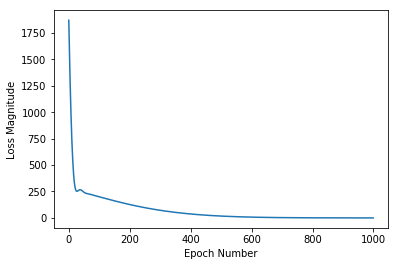

In [88]:
import matplotlib.pyplot as plt
plt.xlabel("Epoch Number")
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

In [89]:
print(history.history)

{'loss': [1870.055419921875, 1723.9898681640625, 1585.0506591796875, 1453.3485107421875, 1328.977294921875, 1212.0050048828125, 1102.474853515625, 1000.4041137695312, 905.7781372070312, 818.5509643554688, 738.6419677734375, 665.9351806640625, 600.277099609375, 541.475830078125, 489.3017883300781, 443.4864196777344, 403.72491455078125, 369.6772155761719, 340.97137451171875, 317.2071228027344, 297.96063232421875, 282.7901611328125, 271.2427978515625, 262.8608703613281, 257.1894226074219, 253.78370666503906, 252.21661376953125, 252.08489990234375, 253.01551818847656, 254.67080688476562, 256.7521667480469, 259.0026550292969, 261.2081298828125, 263.1975402832031, 264.8412170410156, 266.0487060546875, 266.76544189453125, 266.9686279296875, 266.6629638671875, 265.8755187988281, 264.65142822265625, 263.0484619140625, 261.1332092285156, 258.97650146484375, 256.64996337890625, 254.222900390625, 251.759765625, 249.3180694580078, 246.94708251953125, 244.68682861328125, 242.56802368164062, 240.6119

## Use the model to predict values

In [90]:
print("Predicted value = {}".format(model.predict([100])))

Predicted value = [[214.12532]]


In [91]:
print("Actual value = {}".format(F(100)))

Actual value = 212.0


## Looking at the  layer weights

In [92]:
print("Layer weights: {}".format(l0.get_weights()))

Layer weights: [array([[1.8268344]], dtype=float32), array([31.441885], dtype=float32)]


## Experiment

What if we will create model with more layers?

Predicted value = [[212.]]
l0 weights = [array([[ 0.23017567, -0.7343642 ,  0.14488555,  0.45408925]],
      dtype=float32), array([-2.001966 , -4.4955235, -1.2199146,  1.5192373], dtype=float32)]
l1 weights = [array([[ 0.08954089,  0.11590323, -0.5123099 , -1.0978794 ],
       [ 1.1240268 ,  0.27668273, -0.31162643, -1.4777067 ],
       [ 0.8912671 ,  0.22375709, -0.44281846, -0.6334536 ],
       [ 0.1365329 ,  0.0682172 ,  0.61288965,  0.21725811]],
      dtype=float32), array([-1.8628086,  1.4318801,  1.439309 ,  3.5797985], dtype=float32)]
l2 weights = [array([[-0.38220283],
       [ 0.46716142],
       [ 0.19115028],
       [ 1.8539952 ]], dtype=float32), array([2.9586775], dtype=float32)]


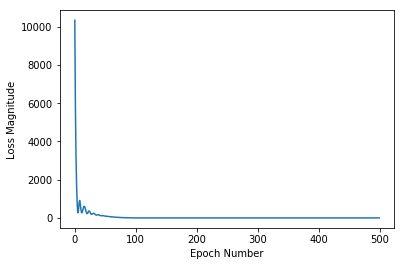

In [93]:
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])
l1 = tf.keras.layers.Dense(units=4)
l2 = tf.keras.layers.Dense(units=1)

model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
history = model.fit(celcius_values, farengheit_values, epochs=500, verbose=False)

import matplotlib.pyplot as plt
plt.xlabel("Epoch Number")
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

print("Predicted value = {}".format(model.predict([100])))

print("l0 weights = {}".format(l0.get_weights()))
print("l1 weights = {}".format(l1.get_weights()))
print("l2 weights = {}".format(l2.get_weights()))

## Experiment 2

Try to predict y(x) = x *x function

In [94]:
def F2(x):
  return x * x

f2_input_values = np.array([])
f2_output_values = np.array([])

for value in range (0, 250, 2):
  f2_input_values = np.append(f2_input_values, value)
  f2_output_values = np.append(f2_output_values, F2(value))

print("F2 values input = {} output = {}".format(f2_input_values, f2_output_values))
  

F2 values input = [  0.   2.   4.   6.   8.  10.  12.  14.  16.  18.  20.  22.  24.  26.
  28.  30.  32.  34.  36.  38.  40.  42.  44.  46.  48.  50.  52.  54.
  56.  58.  60.  62.  64.  66.  68.  70.  72.  74.  76.  78.  80.  82.
  84.  86.  88.  90.  92.  94.  96.  98. 100. 102. 104. 106. 108. 110.
 112. 114. 116. 118. 120. 122. 124. 126. 128. 130. 132. 134. 136. 138.
 140. 142. 144. 146. 148. 150. 152. 154. 156. 158. 160. 162. 164. 166.
 168. 170. 172. 174. 176. 178. 180. 182. 184. 186. 188. 190. 192. 194.
 196. 198. 200. 202. 204. 206. 208. 210. 212. 214. 216. 218. 220. 222.
 224. 226. 228. 230. 232. 234. 236. 238. 240. 242. 244. 246. 248.] output = [0.0000e+00 4.0000e+00 1.6000e+01 3.6000e+01 6.4000e+01 1.0000e+02
 1.4400e+02 1.9600e+02 2.5600e+02 3.2400e+02 4.0000e+02 4.8400e+02
 5.7600e+02 6.7600e+02 7.8400e+02 9.0000e+02 1.0240e+03 1.1560e+03
 1.2960e+03 1.4440e+03 1.6000e+03 1.7640e+03 1.9360e+03 2.1160e+03
 2.3040e+03 2.5000e+03 2.7040e+03 2.9160e+03 3.1360e+03 3.3640e+03
 3.

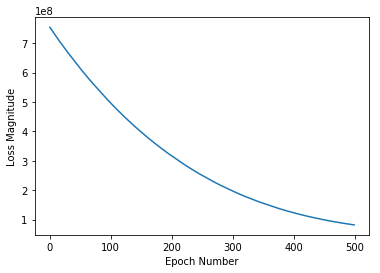

In [95]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])
model = tf.keras.Sequential([l0])
model.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.Adam(0.1))
history = model.fit(f2_input_values, f2_output_values, epochs=500, verbose=False)

import matplotlib.pyplot as plt
plt.xlabel("Epoch Number")
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

**Let's compare our predictions on 2D graphic**

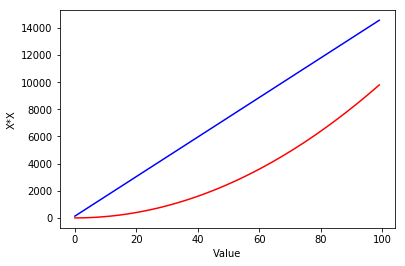

In [96]:
f2_input_test_values = np.array([])
f2_predicted_values = np.array([])
f2_actual_values = np.array([])

for value in range (0, 100, 1):
  f2_input_test_values = np.append(f2_input_test_values, value)
  f2_actual_values = np.append(f2_actual_values, F2(value))
  
f2_predicted_values = model.predict(f2_input_test_values)
import matplotlib.pyplot as plt

plt.xlabel("Value")
plt.ylabel("X*X")
plt.plot(f2_input_test_values, f2_actual_values, color='red')
plt.plot(f2_input_test_values, f2_predicted_values, color='blue')

### Summary:
System with one neuron can predict only linear data

### Let's try to model our function with more complex model with multiple neurons

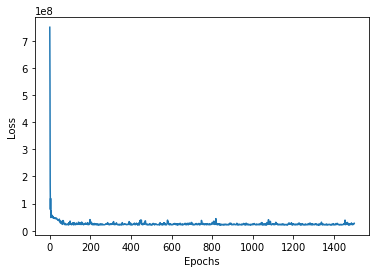

In [97]:
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])
l1 = tf.keras.layers.Dense(units=4)
l2 = tf.keras.layers.Dense(units=4)
l3 = tf.keras.layers.Dense(units=4)
l4 = tf.keras.layers.Dense(units=1)

model2 = tf.keras.Sequential([l0, l1, l2, l3, l4])
model2.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
history = model2.fit(f2_input_values, f2_output_values, epochs=1500, verbose=False)

import matplotlib.pyplot as plt

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(history.history["loss"])

l0 weights = [array([[ 1.5252736 ,  0.21379168, -0.11595906, -0.6768808 ]],
      dtype=float32), array([-35.784225, -36.902096,  23.15456 ,  34.81704 ], dtype=float32)]
l1 weights = [array([[-1.8511305 ,  0.04961481,  2.6365135 , -0.3605496 ],
       [ 0.15461013, -0.3445709 ,  0.7634266 , -0.11846746],
       [-0.6226024 ,  0.05622692, -0.48815498, -0.4652175 ],
       [ 0.4498326 ,  0.2193598 , -1.5411857 , -0.01482083]],
      dtype=float32), array([ 31.011177,  12.500925, -31.3514  ,  29.965033], dtype=float32)]
l2 weights = [array([[-0.18073744, -2.3527746 , -0.528849  , -0.40574777],
       [-0.6613877 ,  0.07204168,  0.48141187,  0.33641613],
       [-0.2940202 ,  3.200449  , -0.32918885, -1.2479204 ],
       [-0.8458051 , -0.20505887, -0.51935446,  0.77281314]],
      dtype=float32), array([ 23.923624, -25.96456 , -17.118116,  25.537294], dtype=float32)]
l2 weights = [array([[ 0.6488678 , -0.30611122,  0.5504936 ,  1.1765196 ],
       [-0.06051943,  0.0181651 , -3.1209192 ,  1

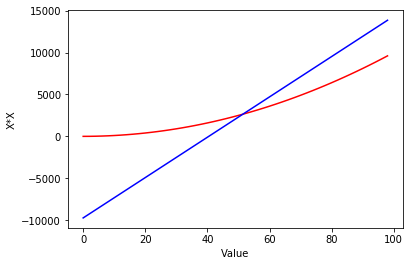

In [98]:
f2_input_test_values = np.array([])
f2_actual_values = np.array([])

for value in range (0, 100, 2):
  f2_input_test_values = np.append(f2_input_test_values, value)
  f2_actual_values = np.append(f2_actual_values, F2(value))
  
f2_predicted_values = model2.predict(f2_input_test_values)
import matplotlib.pyplot as plt

plt.xlabel("Value")
plt.ylabel("X*X")
plt.plot(f2_input_test_values, f2_actual_values, color='red')
plt.plot(f2_input_test_values, f2_predicted_values, color='blue')
print("l0 weights = {}".format(l0.get_weights()))
print("l1 weights = {}".format(l1.get_weights()))
print("l2 weights = {}".format(l2.get_weights()))
print("l2 weights = {}".format(l3.get_weights()))
print("l2 weights = {}".format(l4.get_weights()))